# Group 29 Project Report: An Analysis on Distinguishing the Presence or Absence of Heart Disease

## Introduction
***

According to the Centers for Disease Control and Prevention, heart disease is any condition that affects the structure or function of the heart, often caused by high blood pressure, high cholesterol, or smoking. In the United States of America, heart disease-related complications are the leading cause of death - around 659,000 deaths each year (Centers of Disease Control and Prevention, 2020).

To investigate the main factors behind heart disease, I posit the question: "<b>Given values for the age, resting_blood_pressure, cholesterol, ST_depression, and max_heart_rate predictors, what would be the heart disease diagnosis?</b>" using a K-Nearest Neighbours (KNN) classification algorithm on the <i>[Processed Cleveland Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)</i>. This dataset contains 14 variables and 303 observations (Machine Learning Repository, n.d.).

### Dataset Information
| Variable | Brief Explanation |
| --- | --- |
| Age | a patient's age |
| Sex | a patient's sex (1 = male, 0 = female) |
| Chest Pain Type | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic |
| Resting Blood Pressure | in mm Hg on admission to the hospital |
| Serum Cholesterol | a patient's cholesterol measurement in mg/dl |
| Fasting Blood Sugar > 120 mg/dl | 1 = true, 0 = false |
| Resting Electrocardiographic Results | 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria |
| Max Heart Rate | a patient's maximum heart rate measured in bpm |
| Exercised Induced Angina | (1 = yes, 0 = no); angina is a type of heart pain |
| ST Depression Value | a measure of a part of an electrocardiogram reading after exercise, relative to rest |
| Peak ST Segment Slope | (1 = upsloping, 2 = flat, 3 = downsloping); another measure of the slope of a part of an electrocardiogram reading after exercise |
| Number of Major Vessels (coloured by fluoroscopy) | 0, 1, 2, 3 (vessels) |
| Thalassemia | (3 = normal, 6 = fixed defect, 7 = reversable defect); this disorder causes red blood cells to carry less oxygen to the heart |
| Heart Disease Diagnosis | 0 = absence, 1, 2, 3, 4 = presence |

## Methods and Results
***

First, I import the necessary R packages, set the seed to 3 for reproducibility, and set warn to -1 to suppress global warning messages for readability. 

In [1]:
library(tidyverse)
library(tidymodels)
set.seed(3)
options(warn = -1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Now, I download the data file from the dataset URL with <i>download.file()</i> and load the data into an R data frame with <i>read_csv()</i>. 

In [2]:
data_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

download.file(data_url, destfile = "heart_disease_data.csv")

Although the data frame is relatively tidy, I perform some wrangling improvements:
- Adding variable names 
- Converting values > 1 in the diagnosis variable to be 1 (as specified in the dataset's notes)
- Converting the diagnosis variable to become a factor
- Converting the diagnosis values (0, 1) to be "<b>Absence</b>" and "<b>Presence</b>"
- Converting "?" values to NAs
- Removing 8 categorical variables as including categorical predictors makes KNN classification difficult
- Removing 6 observations with NAs

### Table 1 - Raw Heart Disease Data Frame

In [3]:
heart_disease <- read_csv("heart_disease_data.csv",
                          col_names = c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "electrocardio_results", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_peak_slope", "major_vessels", "thal", "diagnosis"))
heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_pressure = col_double(),
  cholesterol = col_double(),
  fasting_blood_sugar = col_double(),
  electrocardio_results = col_double(),
  max_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  ST_depression = col_double(),
  ST_peak_slope = col_double(),
  major_vessels = col_character(),
  thal = col_character(),
  diagnosis = col_double()
)



age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,electrocardio_results,max_heart_rate,exercise_induced_angina,ST_depression,ST_peak_slope,major_vessels,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


### Table 2 - Cleansed Heart Disease Data Frame

In [4]:
heart_disease <- heart_disease %>%
    mutate(diagnosis = as.factor(ifelse(diagnosis == 0, "Absence", "Presence")))

heart_disease[heart_disease == "?"] <- NA

heart_disease <- heart_disease %>%
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, ST_depression, diagnosis)

heart_disease <- na.omit(heart_disease)

heart_disease

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,Absence
67,160,286,108,1.5,Presence
67,120,229,129,2.6,Presence
37,130,250,187,3.5,Absence
41,130,204,172,1.4,Absence
56,120,236,178,0.8,Absence
62,140,268,160,3.6,Presence
57,120,354,163,0.6,Absence
63,130,254,147,1.4,Presence


I then split the data into training (75%) and testing (25%) datasets using the <i>initial_split()</i> function.

In [56]:
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = diagnosis)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

### Table 3 - Heart Disease Training Dataset

In [6]:
heart_disease_train

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,Absence
67,160,286,108,1.5,Presence
37,130,250,187,3.5,Absence
41,130,204,172,1.4,Absence
56,120,236,178,0.8,Absence
62,140,268,160,3.6,Presence
63,130,254,147,1.4,Presence
53,140,203,155,3.1,Presence
57,140,192,148,0.4,Absence


#### Class Frequency

Using the training set, I will now perform preliminary data analysis to explore the <b>class frequencies</b> of the <i>diagnosis</i> predictor, use <b>forward selection</b> to choose the predictor columns, and summarize the <b>mean predictor values</b> of the chosen predictors.  

### Table 4 - Absence and Presence Frequency

In [7]:
heart_disease_proportions <- heart_disease_train %>%
    group_by(diagnosis) %>%
    summarize(count = n()) %>%
    mutate(percent = 100 * count / nrow(heart_disease_train))

heart_disease_proportions

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,count,percent
<fct>,<int>,<dbl>
Absence,123,53.94737
Presence,105,46.05263


From Table 3, there is a fairly equal proportion of observations with an <b>Absence</b> diagnosis (~ 54%) and <b>Presence</b> diagnosis (~ 46%), so we will not need to manipulate the proportions. 

#### Forward Selection

Now, I will using the forward selection method to help determine predictor variables that will maximize classification accuracy and result in a simple model (Timbers et al., 2022). 

In [8]:
#seed is set once again to the same value for reproducibility of the forward selection results
set.seed(3)

names <- colnames(heart_disease_train %>% select(-diagnosis))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(heart_disease_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

### Table 5 - Forward Selection Accuracy Values

In [9]:
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diagnosis ~ ST_depression,0.7100483
2,diagnosis ~ ST_depression+age,0.7058937
3,diagnosis ~ ST_depression+age+resting_blood_pressure,0.6973913
4,diagnosis ~ ST_depression+age+resting_blood_pressure+max_heart_rate,0.7057971
5,diagnosis ~ ST_depression+age+resting_blood_pressure+max_heart_rate+cholesterol,0.7189372


As seen from the results in Table 4, the accuracy value is greatest with four predictors in the fourth row with an accuracy score of ~ 75%. Although using four predictors is projected to provide the greatest accuracy, I believe that adding the cholesterol variable will make the KNN classification results more meaningful because cholesterol is supposedly one of the key determiners of heart disease. Furthermore, with information from the below visualizations and the Centers for Disease Control and Prevention, I will use blood pressure as a predictor because higher blood pressure supposedly leads to increased susceptibility to heart disease. Similarly, I use age and maximum heart rate as predictors because older people are supposedly more susceptible to heart disease, and older people tend to have lower maximum heart rates. Lastly, from the below visualization of "ST Depression Value and Maximum Heart Rate Against Heart Disease Diagnosis", it appears that higher ST Depression values result in the presence of heart disease, which is a relationship I would like to explore. 

In summary, I will choose the following variables to be predictor variables for my KNN classification model: 

1. ST Depression Value 
2. Maximum Heart Rate
3. Resting Blood Pressure
4. Age
5. Cholesterol Levels

#### Mean Predictor Values

I will now calculate the mean value for each predictor.

In [10]:
heart_disease_predictors <- heart_disease_train %>%
    select(-diagnosis) %>%
    map_df(mean)

### Table 6 - Mean Predictor Values

In [11]:
heart_disease_predictors

age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.16667,131.1842,247.0088,149.7632,1.042982


Looking at the fluctuations between the average values of each predictor variable, I will need to standardize the data before training the KNN classification model to ensure that all predictors have equal weight on the classification result. 

### Table 7 - Missing Observations

In [12]:
naCols <- colSums(is.na(heart_disease_train))

print(naCols)

                   age resting_blood_pressure            cholesterol 
                     0                      0                      0 
        max_heart_rate          ST_depression              diagnosis 
                     0                      0                      0 


There are no missing values within the training dataset as I had removed all observations with missing values earlier in the cleaning process.

#### Visualizations

In [13]:
options(repr.plot.width = 12, repr.plot.height = 10)
heart_rate_age_plot <- heart_disease_train %>%
    ggplot(aes(x = age, y = max_heart_rate, color = diagnosis, shape = diagnosis)) +
        geom_point() + 
        labs(x = "Age (yrs)", y = "Max Heart Rate (bpm)", color = "Diagnosis", shape = "Diagnosis") + 
        ggtitle("Maximum Heart Rate and Age against Heart Disease Diagnosis") +
        theme(text = element_text(size = 20))

### Figure 1 - Maximum Heart Rate and Age against Heart Disease Diagnosis

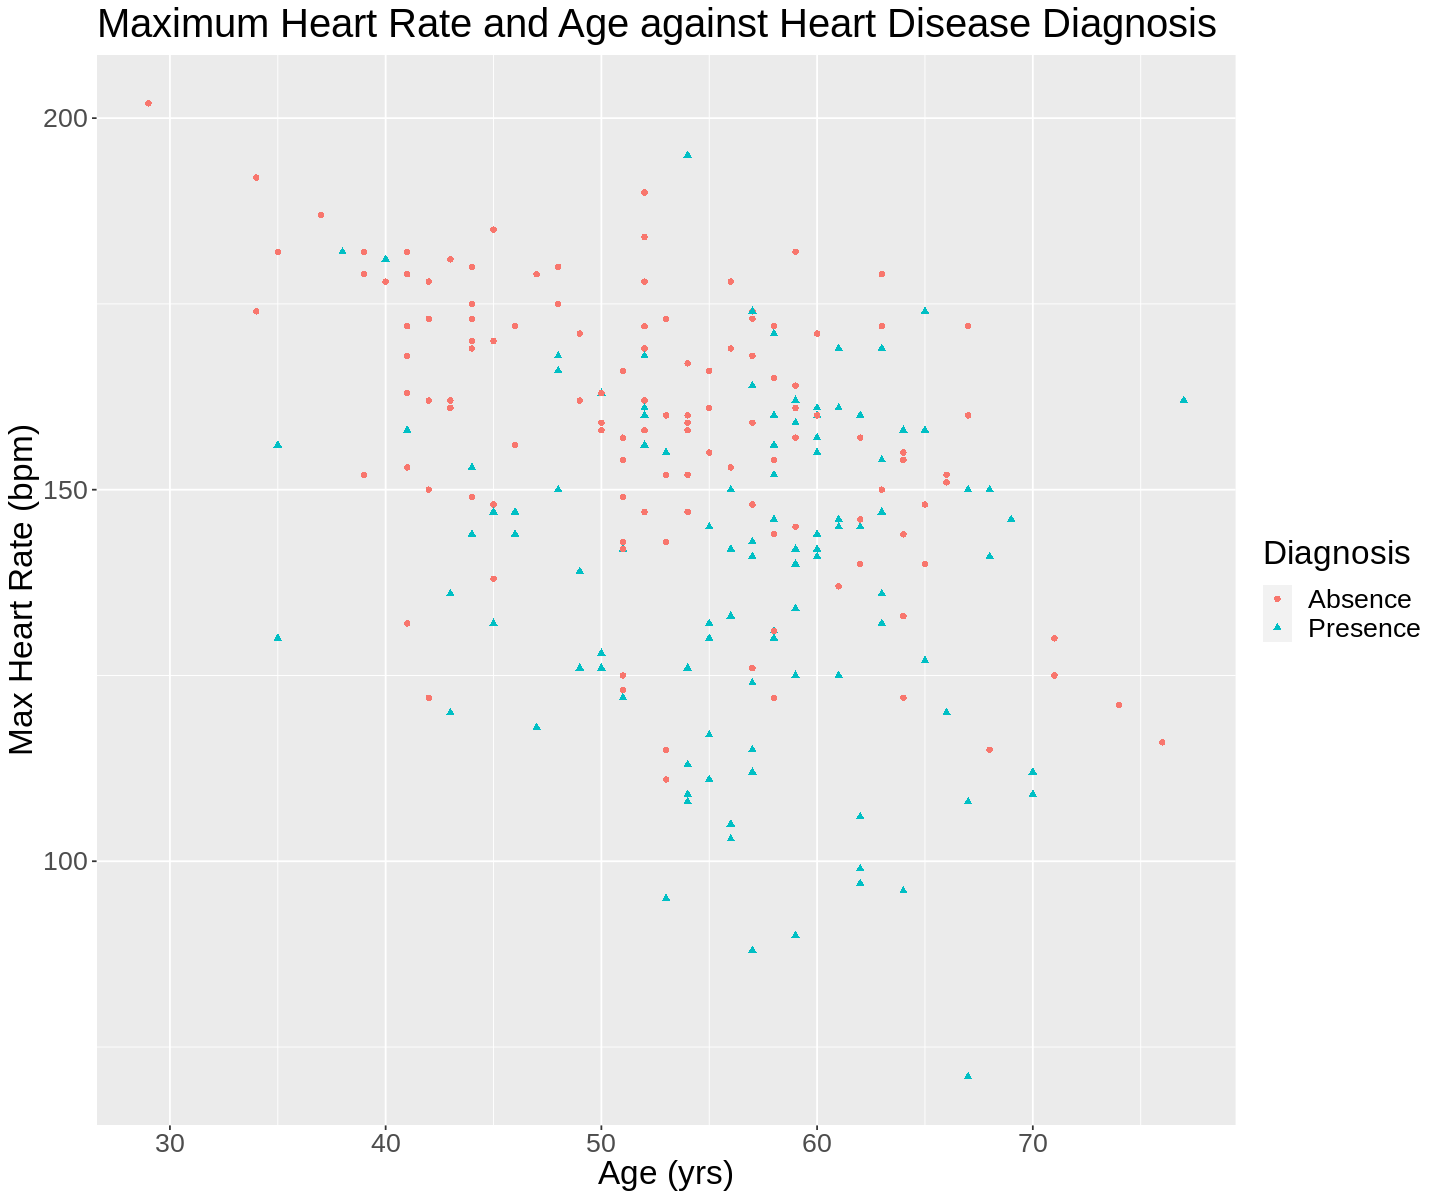

In [14]:
heart_rate_age_plot

From Figure 1, there appears to be a weak, negative relationship between Maximum Heart Rate and Age, meaning that older-aged people tend to have lower maximum heart rates. It also appears that heart disease tends to be more present in people over 50 years of age who have maximum heart rates less than 150 bpm. 

In [15]:
options(repr.plot.width = 12, repr.plot.height = 10)

cholesterol_restingbp_plot <- heart_disease_train %>%
    ggplot(aes(x = resting_blood_pressure, y = cholesterol, color = diagnosis, shape = diagnosis)) +
        geom_point() +
        labs(x = "Resting Blood Pressure (mm Hg)", y = "Cholesterol (mg/dl)", color = "Diagnosis", shape = "Diagnosis") +
        theme(text = element_text(size = 20)) + 
        ggtitle("Cholesterol and Resting Blood Pressure Against Heart Disease Diagnosis") +
        geom_hline(yintercept = 200, linetype = "dashed", size = 0.25, alpha = 0.8) +
        geom_vline(xintercept = 120, linetype = "dashed", size = 0.25, alpha = 0.8) +
        ylim(100, 400) 
# ylim limits y-axis values, excluding some outliers

### Figure 2 - Cholesterol and Resting Blood Pressure Against Heart Disease Diagnosis

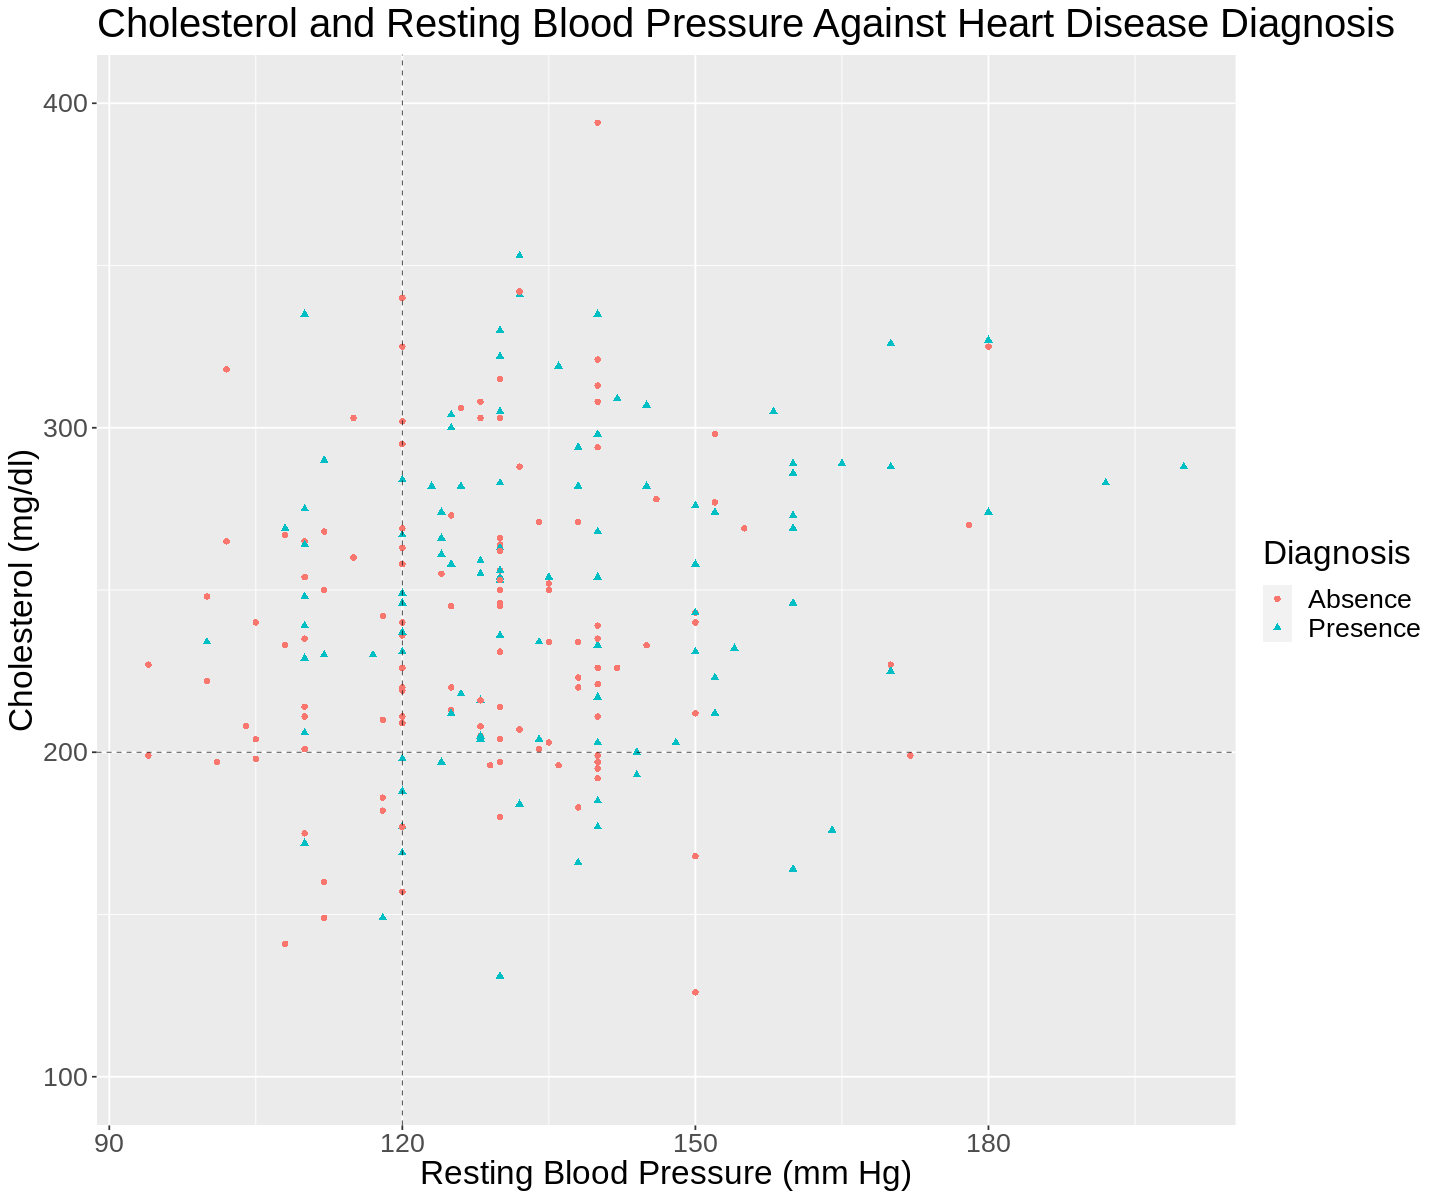

In [16]:
cholesterol_restingbp_plot

For Figure 2, the vertical line at 120 mm Hg represents the recommended healthy blood pressure, which is stated as < 120 mm Hg (Centers for Disease Control and Prevention, 2021). Similarly, the horizontal line at 200 mg/dl represents the recommended healthy cholesterol level, which is stated as < 200 mg/dl (Centers for Disease Control and Prevention, 2021). 

From the figure, most of the observations in the dataset lie in the "unhealthy" categories for both cholesterol and resting blood pressure levels. If we look at the figure as having four quadrants split by the dashed lines, it is difficult to tell which quadrant has a greater proportion of data points with heart disease presence. 

So I will summarize the proportions of each quadrants in the following four tables.

In [17]:
high_chl_and_bp <- heart_disease_train %>%
    filter((resting_blood_pressure >= 120) & (cholesterol >= 200)) %>%
    group_by(diagnosis) %>%
    summarize(count = n()) %>%
    mutate(percent = 100 * count / (82 + 79))

`summarise()` ungrouping output (override with `.groups` argument)



### Table 8 - High Cholesterol and High Resting Blood Pressure (Top-Right Quadrant)

In [18]:
high_chl_and_bp

diagnosis,count,percent
<fct>,<int>,<dbl>
Absence,75,46.58385
Presence,76,47.20497


In [19]:
low_chl_and_bp <- heart_disease_train %>%
    filter((resting_blood_pressure < 120) & (cholesterol < 200)) %>%
    group_by(diagnosis) %>%
    summarize(count = n()) %>%
    mutate(percent = 100 * count / (6 + 4))

`summarise()` ungrouping output (override with `.groups` argument)



### Table 9 - Low Cholesterol and Low Resting Blood Pressure (Bottom-Left Quadrant)

In [20]:
low_chl_and_bp

diagnosis,count,percent
<fct>,<int>,<dbl>
Absence,9,90
Presence,2,20


In [21]:
low_chl_and_high_bp <- heart_disease_train %>%
    filter((resting_blood_pressure >= 120) & (cholesterol < 200)) %>%
    group_by(diagnosis) %>%
    summarize(count = n()) %>%
    mutate(percent = 100 * count / (15 + 12))

`summarise()` ungrouping output (override with `.groups` argument)



### Table 10 - Low Cholesterol and High Resting Blood Pressure (Bottom-Right Quadrant)

In [22]:
low_chl_and_high_bp

diagnosis,count,percent
<fct>,<int>,<dbl>
Absence,15,55.55556
Presence,14,51.85185


In [23]:
high_chl_and_low_bp <- heart_disease_train %>%
    filter((resting_blood_pressure < 120) & (cholesterol >= 200)) %>%
    group_by(diagnosis) %>%
    summarize(count = n()) %>%
    mutate(percent = 100 * count / (20 + 10))

`summarise()` ungrouping output (override with `.groups` argument)



### Table 11 - Low Cholesterol and High Resting Blood Pressure (Top-Left Quadrant)

In [24]:
high_chl_and_low_bp

diagnosis,count,percent
<fct>,<int>,<dbl>
Absence,24,80.00000
Presence,13,43.33333


From the above four tables, it appears that each quadrant has a relatively balanced proportion of data points with heart disease presence and absence. But the High Cholesterol and High Blood Pressure table has the highest proportion of data points with heart disease presence (~ 49%) and the High Cholesterol and Low Blood Pressure table has the lowest proportion of data points with heart disease presence (~ 67%). 

In [25]:
options(repr.plot.width = 12, repr.plot.height = 10)
ST_heart_rate_plot <- heart_disease_train %>%
    ggplot(aes(x = max_heart_rate, y = ST_depression, color = diagnosis, shape = diagnosis)) +
        geom_point() + 
        labs(x = "Max Heart Rate (bpm)", y = "ST Depression Value",  color = "Diagnosis", shape = "Diagnosis") + 
        ggtitle("ST Depression Value and Maximum Heart Rate Against \n Heart Disease Diagnosis") +
        theme(text = element_text(size = 20))

### Figure 3 - ST Depression Value and Maximum Heart Rate Against Heart Disease Diagnosis

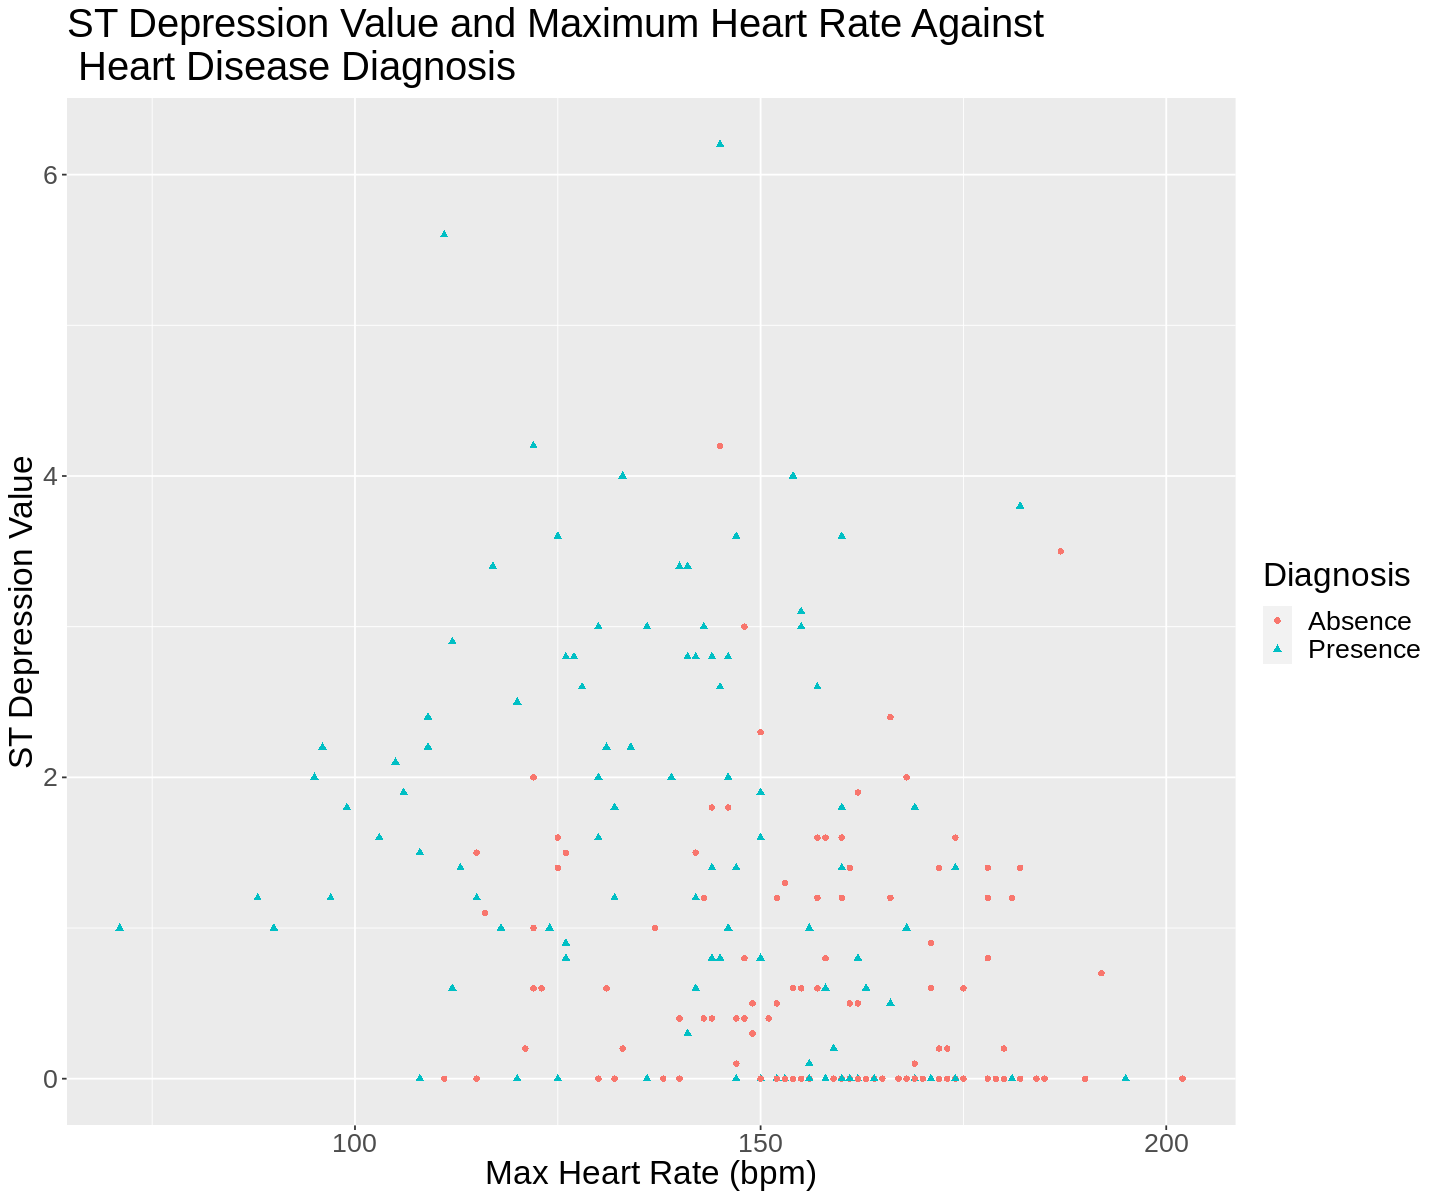

In [26]:
ST_heart_rate_plot

Firstly, I decided to compare Maximum Heart Rate with ST Depression Value because both these predictors measure heartbeats in different ways. However, from Figure 3, it appears that there is no relationship between ST Depression Value and Maximum Heart Rate. However, it appears that observations with greater ST Depression Values  (> 2 in particular) and lower Maximum Heart Rates (< 150 bpm in particular), have a greater likelihood to have a heart disease presence.

With predictor variable selection and preliminary data analysis complete, I will now create, train, and test my KNN classification model. 

### Recipe
I first create the model's recipe to predict the diagnosis variable based on the other predictor variables. These predictor variables will be standardized such that each predictor has an equal "weight contribution" to the classification. 

In [36]:
heart_disease_recipe <- recipe(diagnosis ~ ., data = heart_disease_train) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())

### Model Specification

In [30]:
heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

### Cross Validation Workflow
I will now perform cross-validation with 5 folds for K-values ranging from 1 to 100. Afterwards, I filter the metrics tibble for accuracy metrics for each K-value and choose the K-value associated with the highest accuracy. 

In [40]:
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = diagnosis)

heart_disease_results <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(heart_disease_spec) %>%
    tune_grid(resamples = heart_disease_vfold, grid = 100) %>%
    collect_metrics()

accuracies <- heart_disease_results %>%
    filter(.metric == "accuracy") %>%
    arrange(desc(mean))

### Table 12 - Cross Validation Results for the Accuracies of K-Values from 1 to 100 Nearest Neighbors

In [41]:
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,accuracy,binary,0.8242908,5,0.01551140,Model07
8,accuracy,binary,0.8242908,5,0.01551140,Model08
11,accuracy,binary,0.8159574,5,0.02308219,Model11
12,accuracy,binary,0.8159574,5,0.02308219,Model12
9,accuracy,binary,0.8118794,5,0.01944432,Model09
10,accuracy,binary,0.8118794,5,0.01944432,Model10
5,accuracy,binary,0.8034574,5,0.01014926,Model05
6,accuracy,binary,0.8034574,5,0.01014926,Model06
15,accuracy,binary,0.7951241,5,0.03366064,Model15


In [49]:
accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Accuracy Estimate versus the Number of K Nearest Neighbors") +
    theme(text = element_text(size = 20))

### Figure 4 - Accuracy Estimate versus the Number of K Nearest Neighbors

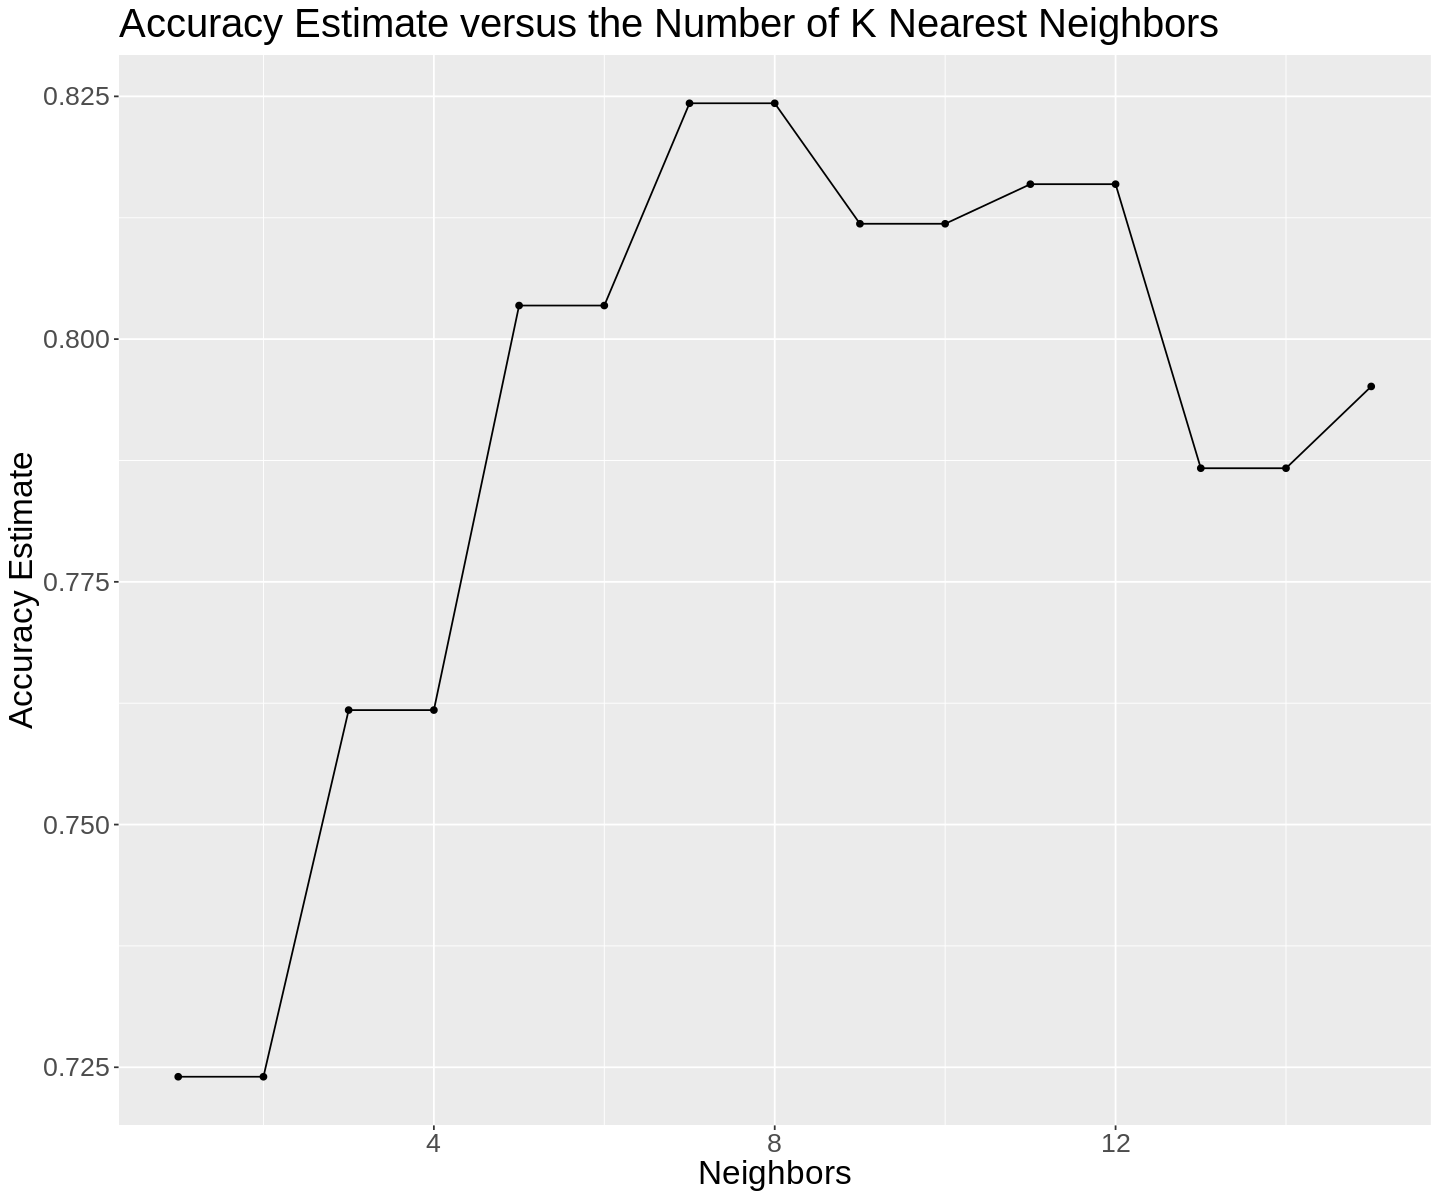

In [50]:
accuracies_plot

### Best K-Value

In [44]:
best_k <- accuracies %>%
    slice(1) %>%
    pull(neighbors)
best_k

[1] 7

The cross-validation results determined that 7 neighbors was the optimal number of neighbors producing the highest accuracy KNN classfication model. I will now update the model specification with this K-value. 

In [58]:
heart_disease_spec_best_k <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
    set_engine("kknn") %>%
    set_mode("classification")

heart_disease_workflow <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(heart_disease_spec_best_k)

heart_disease_fit <- heart_disease_workflow %>%
    fit(data = heart_disease_train)

test_predictions <- predict(heart_disease_fit, heart_disease_test) %>%
    bind_cols(heart_disease_test) 

# used later in the discussion section
prediction_accuracy <- test_predictions %>%
    metrics(truth = diagnosis, estimate = .pred_class)

# used later in the discussion section
heart_disease_matrix <- test_predictions %>%
    conf_mat(truth = diagnosis, estimate = .pred_class)

Now that I have trained and tested the model, I will now 

### Figure 5 - Maximum Heart Rate and Age against Heart Disease Diagnosis Revisited

### Figure 6 - Cholesterol and Resting Blood Pressure Against Heart Disease Diagnosis Revisited

### Figure 7 - ST Depression Value and Maximum Heart Rate Against Heart Disease Diagnosis Revisited

## Discussion 
***

### Table 13 - Prediction Accuracy

In [53]:
prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9482759
kap,binary,0.8958084


### Table 14 - Confusion Matrix

In [52]:
heart_disease_matrix

          Truth
Prediction Absence Presence
  Absence       30        2
  Presence       1       25

## Works Cited
***

"Getting Your Cholesterol Checked." <i>Centers for Disease Control and Prevention</i>, 15 Apr. 2021, www.cdc.gov/cholesterol/cholesterol_screening.htm. Accessed 15 Feb. 2022.

"Heart Disease Facts." <i>Centers for Disease Control and Prevention</i>, 9 Sept. 2020, www.cdc.gov/heartdisease/facts.htm. Accessed 15 Feb. 2022.

"High Blood Pressure Symptoms, Causes, and Problems | Cdc.gov." <i>Centers for Disease Control and Prevention</i>, 18 May 2021, www.cdc.gov/bloodpressure/about.htm. Accessed 15 Feb. 2022.

"Know Your Risk for Heart Disease." <i>Centers for Disease Control and Prevention</i>, 10 Dec. 2019, www.cdc.gov/heartdisease/risk_factors.htm. Accessed 15 Feb. 2022.

Timbers, Tiffany, et al. "Chapter 6 Classification II: Evaluation & Tuning | Data Science." Data Science, 2 Mar. 2022, datasciencebook.ca/classification2.html#forward-selection-in-r. Accessed 15 Feb. 2022.

"UCI Machine Learning Repository: Heart Disease Data Set." archive.ics.uci.edu/ml/datasets/Heart+Disease. Accessed 12 Feb. 2022.